## 3. Escalado de datos - Challenge 2

Seguiremos usando los datos de la sección anterior:

1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score. ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar? **Nota:** Para reescalar los datos, pueden hacerlo "a mano" o utilizar la clase `StandardScaler` de Scikit-Learn. No te olvides que las herramientas de preprocesamiento de datos de Scikit-learn tienen los mismos métodos (crear el objeto, fitearlo, transfromar los datos). Si necesitás ayuda, podés consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
2. Realizá, en un mismo gráfico, un histograma de los datos reescaleados y un histograma de los datos crudos. ¿Qué similitudes y qué diferencias tiene con la distribución de datos crudos?
3. Aplica la regla de las tres sigmas utilizando los datos reescalados.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Data\DS_Bitácora_19_Data_VA1.csv')

In [3]:
valor_medio = data.Datos.mean()
std = data.Datos.std()
print (data.Datos.mean(), data.Datos.std())

# En forma Manual, hacemos el escalado  a tráves del Z-Score
data['Datos_Reescalados'] = (data.Datos - valor_medio) / std # Creo una nueva columna
data.head()

4.952783208727358 2.0080226886502133


,Datos,Datos_Reescalados
0,2.370556,-1.285955
1,3.437876,-0.754427
2,6.300131,0.670982
3,5.403170,0.224294
4,5.722120,0.383131


In [4]:
# Vemos cuánto es la media y la desviación de la columna reescalada. Se redondean los decimales a 2
# Se convierte en una distribución Normal.
# El promedio es 0 y la desv. estándar es 1.
print (data.Datos_Reescalados.mean().round(2), data.Datos_Reescalados.std().round(2))

0.0 1.0


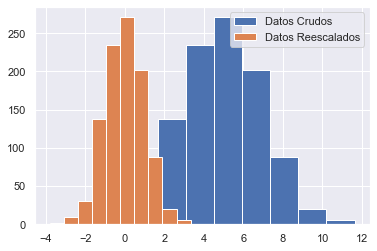

In [5]:
data.Datos.hist (label = 'Datos Crudos')
data.Datos_Reescalados.hist (label = 'Datos Reescalados')
plt.legend()
plt.show()

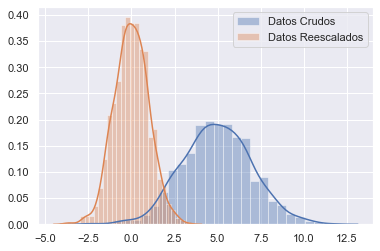

In [6]:
sns.distplot(data.Datos.values, label = 'Datos Crudos')
sns.distplot(data.Datos_Reescalados.values, label = 'Datos Reescalados')
plt.legend()
plt.show()

* Vemos como se normaliza la distribución.

In [7]:
mascara_outliers = np.logical_or (data.Datos_Reescalados < -3, data.Datos_Reescalados > +3)
print(mascara_outliers.sum())

3


In [8]:
data[mascara_outliers] # Vemos cuales son los datos considerados como Outliers

,Datos,Datos_Reescalados
181,-1.925574,-3.425438
426,-2.619781,-3.771155
624,11.628151,3.324349


In [9]:
# Hacemos el preprocesamiento de manera automática, a partir de la Libreria de preprocesamiento de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(type(data.Datos))
print(type(data [['Datos']]))
print(scaler.fit(data [['Datos']])) # Estimador del escalador
print(scaler.mean_, scaler.var_**(1/2)) # Vemos la media y la std resultante de haber hecho el fit
data['Datos_StandardScaler'] = scaler.transform(data [['Datos']]) # Hacemos la transformación y los volcamos en una nueva columna
data.head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
StandardScaler(copy=True, with_mean=True, with_std=True)
[4.95278321] [2.00701843]


,Datos,Datos_Reescalados,Datos_StandardScaler
0,2.370556,-1.285955,-1.286599
1,3.437876,-0.754427,-0.754805
2,6.300131,0.670982,0.671318
3,5.403170,0.224294,0.224406
4,5.722120,0.383131,0.383323


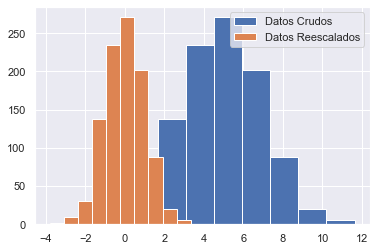

In [10]:
data.Datos.hist (label = 'Datos Crudos')
data.Datos_StandardScaler.hist (label = 'Datos Reescalados')
plt.legend()
plt.show()

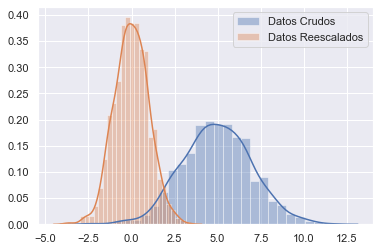

In [11]:
sns.distplot(data.Datos.values, label = 'Datos Crudos')
sns.distplot(data.Datos_StandardScaler.values, label = 'Datos Reescalados')
plt.legend()
plt.show()

* El StandardScaler **no funciona** muy bien cuando tenemos Ley de Potencias o hay muchos Outliers Extremos (altamente Dispersos).

* Lo que podemos utilizar es el **RobustScaler**, el cual aplica Z-Score, pero además utiliza los percentiles (IQR), para ver dónde tiene que concentrar el escalado.
* Permite que las escalas de los ejes X e Y sean similares.
* Podría aplicarse fácilmente el modelo de K-Vecinos.

In [12]:
from sklearn.preprocessing import RobustScaler
scaler2 = RobustScaler()
print(scaler2.fit(data [['Datos']]))
print(scaler2.center_, scaler2.scale_) # El centro es como una media; la escala se relaciona al rango intercuartil con el que vamos a trabajar 
data['Datos_RobustScaler'] = scaler2.transform(data [['Datos']])
data.head()

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
[4.96048791] [2.72534207]


,Datos,Datos_Reescalados,Datos_StandardScaler,Datos_RobustScaler
0,2.370556,-1.285955,-1.286599,-0.950314
1,3.437876,-0.754427,-0.754805,-0.558687
2,6.300131,0.670982,0.671318,0.491550
3,5.403170,0.224294,0.224406,0.162432
4,5.722120,0.383131,0.383323,0.279463


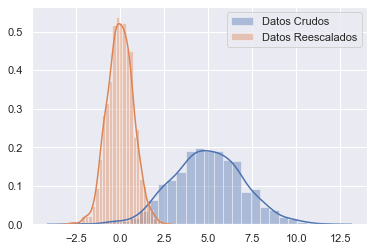

In [13]:
sns.distplot(data.Datos.values, label = 'Datos Crudos')
sns.distplot(data.Datos_RobustScaler.values, label = 'Datos Reescalados')
plt.legend()
plt.show()

* La media continúa siendo 0 (cero), mientras que la std ahora va a depender del rango intercuartilico.
* En éste caso, los resultados con ambos escaladores resultan similares, ya que no hay grandes dispersiones en los datos de la muestra utilizado.

In [14]:
# Escala vectores individuales en una norma unitaria. Es la Normalización entre 0 y 1 (min y max).
from sklearn.preprocessing import Normalizer
norm = Normalizer(norm = 'l2')
data['Datos_Normalizer'] = norm.fit_transform(data [['Datos']]) # Hago fit y transform a la vez
data.sample(50)

,Datos,Datos_Reescalados,Datos_StandardScaler,Datos_RobustScaler,Datos_Normalizer
337,6.275356,0.658644,0.658974,0.482460,1.0
913,7.832452,1.434082,1.434799,1.053799,1.0
18,6.309825,0.675810,0.676148,0.495107,1.0
586,7.050715,1.044775,1.045298,0.766960,1.0
448,3.962905,-0.492962,-0.493209,-0.366040,1.0
736,4.990890,0.018977,0.018987,0.011155,1.0
958,7.035451,1.037173,1.037692,0.761359,1.0
925,3.824068,-0.562103,-0.562384,-0.416982,1.0
745,4.531696,-0.209702,-0.209807,-0.157335,1.0
933,2.518159,-1.212449,-1.213055,-0.896155,1.0


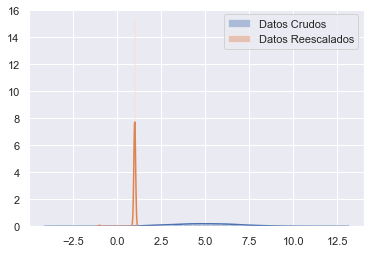

In [15]:
sns.distplot(data.Datos.values, label = 'Datos Crudos')
sns.distplot(data.Datos_Normalizer.values, label = 'Datos Reescalados')
plt.legend()
plt.show()

In [16]:
data.describe()

,Datos,Datos_Reescalados,Datos_StandardScaler,Datos_RobustScaler,Datos_Normalizer
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,4.952783,1.136868e-16,1.136868e-16,-0.002827,0.980000
std,2.008023,1.000000e+00,1.000500e+00,0.736797,0.199097
min,-2.619781,-3.771155e+00,-3.773042e+00,-2.781401,-1.000000
25%,3.607388,-6.700099e-01,-6.703452e-01,-0.496488,1.000000
50%,4.960488,3.836958e-03,3.838878e-03,0.000000,1.000000
75%,6.332730,6.872168e-01,6.875607e-01,0.503512,1.000000
max,11.628151,3.324349e+00,3.326012e+00,2.446542,1.000000


* La Normalización se utiliza mucho en las transformaciones de modelo tipo texto.

## 4. Encoders

__Conversión de variables:__ Los modelos sólo entienden de números. ¿Si los atributos no son números?  

Tipos de variables a tratar:  
* __Numéricas:__ edad, altura, puntaje.
    * Tratamiento: *Discretización/binning*. 
* __Ordinales:__ tamaño de una prenda de ropa.
    * Tratamiento: *Labelización*.
* __Categóricas/nominales:__ nacionalidad, color de una prenda de ropa.
    * Tratamiento: *Variables Dummies/One-Hot Encoding*.
    
**Nota:** para `One-Hot Encoding`, no se deben utilizar muchos atributos, ya que se empiezan a correlacionar los atributos entre sí, generando multicolinealidad, dando lugar a un Overfiting.

#### __Ejercicio:__  
Elige un dataset de los que hayamos usado hasta el momento - puede ser el de Titanic, el de Vinos, el del proyecto o inclusive uno que hayas visto y que te interese - y haz los siguiente ejercicios:

1. ¿De qué tipo es cada atributo?
2. Lleva todos los atributos que te interesen a una forma numérica. ¿Cómo creció tu dataset?
3. Si hay una tarea de regresión o clasificación bien definida sobre ese dataset que te interese explorar, hazlo. Para ello, entrena un modelo de árboles de decisión (no te olvides de seguir todos los pasos de un flujo de Machine Learning: elegir una métrica de evaluación, hacer una `train_test_split`, etc.). ¿Cómo cambia el desempeño del modelo con la incorporación de estos atributos? Recuerda que si utilizas un modelo de vecinos más cercanos, es importante escalar los datos antes.

#### Creo un DataFrame

In [17]:
import pandas as pd
import numpy as np

X = pd.DataFrame(
    np.array(['M', 'O-', 'medium',
             'M', 'O-', 'high',
              'F', 'O+', 'high',
              'F', 'AB', 'low',
              'F', 'B+', np.NaN])
              .reshape((5,3)))
X.columns = ['sexo', 'tipo_sanguineo', 'nivel_educativo']
display(X)

,sexo,tipo_sanguineo,nivel_educativo
0,M,O-,medium
1,M,O-,high
2,F,O+,high
3,F,AB,low
4,F,B+,nan


* Sexo es Nominal (categórica)
* Tipo Sanguíneo es Nominal.
* Nivel Educativo es Ordinal.

* Empezamos por la variable **Ordinal**.

In [18]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X['nivel_educativo_ordinal_encoded'] = ordinal_encoder.fit_transform(X[['nivel_educativo']])
display(X)

,sexo,tipo_sanguineo,nivel_educativo,nivel_educativo_ordinal_encoded
0,M,O-,medium,2.0
1,M,O-,high,0.0
2,F,O+,high,0.0
3,F,AB,low,1.0
4,F,B+,nan,3.0


* Se espera que un numero alto de una categoría high, lo cual no ocurre.
* Vuelvo a hacerlo, ahora ordenando las categorías.

In [19]:
from sklearn.preprocessing import OrdinalEncoder

print(X.nivel_educativo.unique()) # Veo cuales son todas las categorías disponibles
print(type(X[['nivel_educativo']]))
print(type(X['nivel_educativo']))
print(X['nivel_educativo'].values.reshape(-1, 1))
ordinal_encoder = OrdinalEncoder(categories=[['nan','low','medium','high']])

# fit_transform requiere un arreglo de 2 dimensiones, es por ello que hago el reshape, porque sino arrojaría una serie (luce como un vector)
# Quiero que tenga una columna, y n filas s/ la longitud de la serie (-1,1). También puedo hacer doble corchete
X['nivel_educativo_ordinal_encoded'] = ordinal_encoder.fit_transform(X['nivel_educativo'].values.reshape(-1, 1))
display(X)

['medium' 'high' 'low' 'nan']
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
[['medium']
 ['high']
 ['high']
 ['low']
 ['nan']]


,sexo,tipo_sanguineo,nivel_educativo,nivel_educativo_ordinal_encoded
0,M,O-,medium,2.0
1,M,O-,high,3.0
2,F,O+,high,3.0
3,F,AB,low,1.0
4,F,B+,nan,0.0


* Vemos las demás variables que son **Nominales**.

In [20]:
from sklearn.preprocessing import OneHotEncoder
# Puedo codificar varias variables al mismo tiempo

# Quiero que me los codifique como Enteros (no puedo trabajar con flotantes como en OrdinalEncoder)
# Quiero que me devuelva una matriz dispersa (gran parte de los datos son 0, sino 1)
onehot_encoder = OneHotEncoder(dtype=np.int, sparse=True)

# Para poder incorporarlo al Dataframe, lo convertí en un arreglo .toarray(). Sino arrojaría un conjunto de series y valores asociadas a las mismas
transformed = onehot_encoder.fit_transform(X[['sexo', 'tipo_sanguineo']]).toarray()
print(transformed)
print(onehot_encoder.categories_) # Categorías encontramos. Se organizan alfabéticamente

nominales = pd.DataFrame(transformed, columns=['F', 'M', 'AB', 'B+','O+', 'O-']) # Determino el órden
nominales['nivel_educativo'] = X.nivel_educativo # Cree una nueva columna para incorporar al Dataframe, los valores de la misma del Dataframe original
display(nominales)

[[0 1 0 0 0 1]
 [0 1 0 0 0 1]
 [1 0 0 0 1 0]
 [1 0 1 0 0 0]
 [1 0 0 1 0 0]]
[array(['F', 'M'], dtype=object), array(['AB', 'B+', 'O+', 'O-'], dtype=object)]


,F,M,AB,B+,O+,O-,nivel_educativo
0,0,1,0,0,0,1,medium
1,0,1,0,0,0,1,high
2,1,0,0,0,1,0,high
3,1,0,1,0,0,0,low
4,1,0,0,1,0,0,nan


* Coloca **1** en las columnas que cumplen con la condición, para los registros válidos.

In [21]:
# Creo columnas adicionales donfe se indiquen que tipo de sangre son cada uno
dummies = pd.get_dummies(X['tipo_sanguineo'], prefix='tipo_sanguineo')
nominales2 = pd.concat([X, dummies], axis=1)
nominales2

,sexo,tipo_sanguineo,nivel_educativo,nivel_educativo_ordinal_encoded,tipo_sanguineo_AB,tipo_sanguineo_B+,tipo_sanguineo_O+,tipo_sanguineo_O-
0,M,O-,medium,2.0,0,0,0,1
1,M,O-,high,3.0,0,0,0,1
2,F,O+,high,3.0,0,0,1,0
3,F,AB,low,1.0,1,0,0,0
4,F,B+,nan,0.0,0,1,0,0


In [22]:
# Creo columnas adicionales donfe se indiquen sexo y tipo de sangre de cada instancia
dummies = pd.get_dummies(X[['sexo','tipo_sanguineo']], prefix=['sexo','tipo_sanguineo'])
nominales3 = pd.concat([X, dummies], axis=1)
nominales3

,sexo,tipo_sanguineo,nivel_educativo,nivel_educativo_ordinal_encoded,sexo_F,sexo_M,tipo_sanguineo_AB,tipo_sanguineo_B+,tipo_sanguineo_O+,tipo_sanguineo_O-
0,M,O-,medium,2.0,0,1,0,0,0,1
1,M,O-,high,3.0,0,1,0,0,0,1
2,F,O+,high,3.0,1,0,0,0,1,0
3,F,AB,low,1.0,1,0,1,0,0,0
4,F,B+,nan,0.0,1,0,0,1,0,0


#### Nuevo DataFrame
* Quiero Discretizar datos que ahora son Contínuos

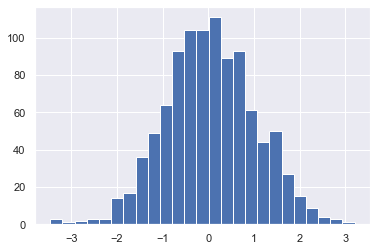

[array([-3.46370462, -2.7968847 , -2.13006478, -1.46324485, -0.79642493,
       -0.12960501,  0.53721492,  1.20403484,  1.87085476,  2.53767469,
        3.20449461])]
[[3.]
 [6.]
 [5.]
 [4.]
 [4.]
 [5.]
 [4.]
 [3.]
 [3.]
 [4.]]


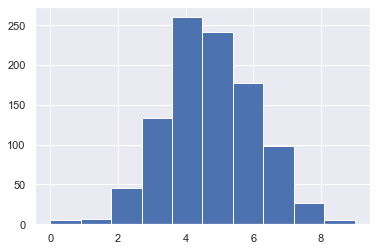

In [23]:
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer # Bin datos continuos en intervalos.
from matplotlib import pyplot

# Muestra de datos con distribución gaussiana (distribución normal)
data = randn(1000) # Devuelve una matriz de valores aleatorios de una distribución univariada "normal" (gaussiana) de media 0 y varianza 1. 

# histograma de los datos originales
pyplot.hist(data, bins=25)
pyplot.show()

# convertimos en arreglo de 1 columna y n filas
data = data.reshape((-1,1))

# discretizamos los datos:
# que agrupe en 10 grupos
# que mantenga el orden de los datos como vienen
# que la estrategia en la que los organice sea uniforme (la distancia entre ellas)
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(data)
print(kbins.bin_edges_)

# presentación de resultados (imprimo las 10 primeras filas)
print(data_trans[:10, :])
# histograma de los datos transformados; los datos varían porque son menor cantidad de grupos de datos
pyplot.hist(data_trans, bins=10)
pyplot.show()

__La discretización__ es el proceso a través del cual podemos `transformar variables continuas`, modelos o funciones `en una forma discreta`. Hacemos esto creando un conjunto de intervalos contiguos (o bins) que atraviesan el rango de nuestra variable / modelo / función deseada. Los datos continuos se miden, mientras que los datos discretos se cuentan